# 读书笔记(机器学习实战) | 第6-9章 决策树、随机森林、降维和无监督学习

> -   书籍简介: 本书通过使用具体的例子、最少的理论和两个可用于生产的 Python 框架——Scikit-Learn 和 TensorFlow——作者 Aurélien Géron 帮助你直观地了解构建智能系统的概念和工具。你将学习一系列技术，从简单的线性回归开始，逐渐深入到深度神经网络。每章都有练习来帮助你应用所学的知识，你只需要有编程经验就可以开始。
>
> -   代码示例: https://github.com/ageron/handson-ml2

# ![研究方向_4](https://jialh.oss-cn-shanghai.aliyuncs.com/img2/研究方向_4.jpg)

## 第6章 决策树
- 与SVM一样，决策树是通用的机器学习算法，可以执行分类和回归任务，甚至多输出任务。它们是功能强大的算法，能够拟合复杂的数据集。
- 决策树也是随机森林的基本组成部分(见第7章)，它们是当今最强大的机器学习算法之一。
- 在本章中，我们将从讨论如何使用决策树进行训练、可视化和做出预测开始。然后，我们将了解Scikit-Learn使用的CART训练算法，并将讨论如何对树进行正则化并将其用于回归任务。最后，我们将讨论决策树的一些局限性。

### 6.1 训练和可视化决策树
为了理解决策树，让我们建立一个决策树，然后看看它是如何做出预测的。以下代码在鸢尾花数据集上训练了一个DecisionTreeClassifier(见第4章)：

In [1]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
 
iris = load_iris() 
X = iris.data[:, 2:] # petal length and width 
y = iris.target 
 
tree_clf = DecisionTreeClassifier(max_depth=2) 
tree_clf.fit(X, y) 


DecisionTreeClassifier(max_depth=2)

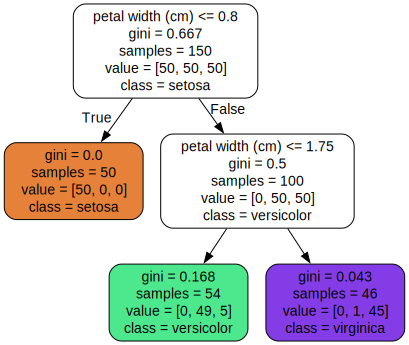

In [2]:
# 决策树的可视化
import os
from sklearn.tree import export_graphviz
from graphviz import Source

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
export_graphviz( 
        tree_clf, 
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:], 
        class_names=iris.target_names, 
        rounded=True, 
        filled=True 
    ) 

# 使用Graphviz软件包中的dot命令行工具将此.dot文件转换为多种格式，例如PDF或PNG
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

### 6.2 做出预测
- 决策树的许多特质之一就是它们几乎不需要数据准备。实际上，它们根本不需要特征缩放或居中。
- 节点的samples属性统计它应用的训练实例数量。
- 节点的value属性说明了该节点上每个类别的训练实例数量。
- 节点的gini属性衡量其不纯度(impurity)：如果应用的所有训练实例都属于同一个类别，那么节点就是“纯”的(gini=0)。
- **基尼不纯度**: $G_i = 1 - \sum_{k=1}^np_{i,k}^2$, 其中$p_{i,k}$是第$i$个节点中训练实例之间的$k$类实例的比例。
- 决策树是直观的，其决策也易于解释。这种模型通常称为白盒模型。相反，正如我们将看到的，通常将随机森林或神经网络视为黑盒模型。

### 6.3 估计类概率
- 决策树同样可以估算某个实例属于特定类$k$的概率：首先，跟随决策树找到该实例的叶节点，然后返回该节点中类$k$的训练实例占比。

### 6.4 CART训练算法
- **分类和回归树(Classification and Regression Tree，CART)算法**： 首先使用单个特征k和阈值tk(例如，“花瓣长度”≤2.45cm”)将训练集分为两个子集。然后， 使用相同的逻
辑将子集进行分割，然后再分割子集，以此类推。一旦达到最大深度(由超参数`max_depth`义)，或者找不到可减少不纯度的分割，它将停止递归。
- 分类和回归树(CART)算法的分类成本函数:
$$
J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}
$$
$$
其中G_{left/right}测量左右子集的不纯度， m_{left/right}测量左右子集的实例数。
$$

### 6.5 计算复杂度
- 决策树的总体预测复杂度为$O(log_2(m))$。与特征数量无关。因此，即使处理大训练集，预测也非常快。

### 6.6 基尼不纯度或熵
- **基尼不纯度**: $G_i = 1 - \sum_{k=1}^np_{i,k}^2$, 其中$p_{i,k}$是第$i$个节点中训练实例之间的$k$类实例的比例。
- **熵**: $H_i = - \sum_{k=1, p_{i,k} \neq 0} p_{i,k} log_2(p_{i,k})$
- <font color="red">基尼不纯度倾向于从树枝中分裂出最常见的类别，而熵则倾向于生产更平衡的树。</font>

### 6.7 正则化参数
- 决策树极少对训练数据做出假设。如果不加以限制，树的结构将跟随训练集变化，严密拟合，并且很可能过拟合。这种模型通常被称为非参数模型。
- 相反，参数模型(比如线性模型)则有预先设定好的一部分参数，因此其自由度受限，从而降低了过拟合的风险(但是增加了欠拟合的风险)。
- **常见的正则化参数包括**: 
    - max_depth (决策树的最大深度 )
    - min_samples_split(分裂前节点必须有的最小样本数)
    - min_samples_leaf(叶节点必须有的最小样本数量)
    - min_weight_fraction_leaf(与min_samples_leaf一样，但表现为加权实例总数的占比)
    - max_leaf_nodes(最大叶节点数量)
    - max_features(分裂每个节点评估的最大特征数量)

### 6.8 回归
- 决策树还能够执行回归任务。主要差别在于，<font color="red">每个节点上不再预测一个类别而是预测一个值。</font>
- <font color="red">每个区域的预测值永远等于该区域内实例的目标平均值。</font>算法分裂每个区域的方法就是使最多的训练实例尽可能接近这个预测值。
- CART算法用于回归: CART算法的工作原理与以前的方法大致相同，不同之处在于，它不再尝试以最小化不纯度的方式来拆分训练集，而是以最小化MSE的方式来拆分训练集。
- CART回归成本函数:
$$
J(k, t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}
$$
$$
其中MSE_{node}=\sum_{i \in node}(\hat y_{node} - y^{(i)})^2, \hat y_{node} = \frac{\sum_{i \in node} y^{(i)}}{m_{node}}
$$


### 6.9 不稳定性
- **决策树的局限性**: 决策树喜欢正交的决策边界(所有分割都垂直于轴)，这使它们对训练集旋转敏感。
- 决策树的主要问题是它们对训练数据中的小变化非常敏感。
- 随机森林可以通过对许多树进行平均预测来限制这种不稳定性，正如我们将在第7章中看到的那样。

## 第7章 集成学习和随机森林
本章我们将探讨最流行的几种集成方法，包括bagging、boosting、stacking等，也将探索随机森林。

### 7.1 投票分类器
- 硬投票分类器: 聚合每个分类器的预测，然后将得票最多的结果作为预测类别。
- 投票分类器的优势: 准确率更高。 只要有足够大数量并且足够多种类的弱学习器，就可以通过集成实现强学习器(准确率高)。
- 软投票分类器: 在多个分类器都能够估算出类别的概率平均值，然后给出平均概率最高的类别作为预测。

In [10]:
# 在卫星数据集上实现投票分类器。
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
 
log_clf = LogisticRegression() 
rnd_clf = RandomForestClassifier() 
svm_clf = SVC(probability=True) 
 
# sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', ...)
voting_clf = VotingClassifier( 
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], 
    voting='hard') 
voting_clf.fit(X_train, y_train) 

soft_voting_clf = VotingClassifier( 
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], 
    voting='soft') 
soft_voting_clf.fit(X_train, y_train) 

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

我们来看一下测试集上每个分类器的精度：

In [11]:
from sklearn.metrics import accuracy_score 
for clf in (log_clf, rnd_clf, svm_clf, voting_clf, soft_voting_clf): 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)) 

LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.896
VotingClassifier 0.896
VotingClassifier 0.912


### 7.2 bagging和pasting
- 采样时如果将样本放回，这种方法叫作bagging(bootstrap aggregating的缩写，也叫自举汇聚法)。
- 采样时样本不放回，这种方法则叫作pasting。
- 换句话说，bagging和pasting都允许训练实例在多个预测器中被多次采样，但是只有bagging允许训练实例被同一个预测器多次采样。
- <font color="red">每个预测器单独的偏差都高于在原始训练集上训练的偏差，但是通过聚合，同时降低了偏差和方差。</font>
- **Scikit-Learn中的bagging和pasting**(baggin给每个预测器的训练子集引入了更高的多样性，效果更好):
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
```
- **包外评估(Out-of-Bag Evaluation)**: 通常每个预测器平均只对63%的训练实例进行采样，剩余37%未被采样的训练实例称为包外(out-of-bag, oob)实例。

### 7.3 随机补丁和随机子空间
- 对训练实例和特征都进行抽样，这称为随机补丁方法。
- 保留所有训练实例但是对特征进行抽样， 这被称为随机子空间法。

### 7.4 随机森林
- 随机森林在树的生长上引入了更多的随机性：分裂节点时不再是搜索最好的特征(见第6章)，而是在一个随机生成的特征子集里搜索最好的特征。这导致决策树具有更大的多样性，<font color="red">(再一次)用更高的偏差换取更低的方差</font>，总之，还是产生了一个整体性能更优的模型。
- **极端随机树**: 如果我们对每个特征使用随机阈值，而不是搜索得出的最佳阈值(如常规决策树)，则可能让决策树生长得更加随机。极端随机树也是以更高的偏差换取了更低的方差。`ExtraTreesClassifier`
- **特征重要性**: Scikit-Learn通过查看使用该特征的树节点平均(在森林中的所有树上)减少不纯度的程度来衡量该特征的重要性。

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [13]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

下图叠加了 15 棵决策树的决策边界。如你所见，尽管每棵决策树都不完美，但整体决策边界还是相当不错的：

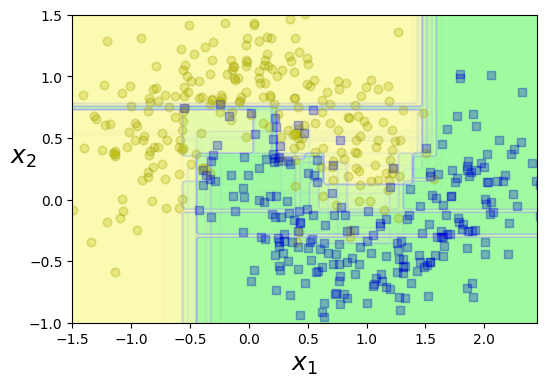

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
plt.figure(figsize=(6, 4))

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X_train[indices_with_replacement], y_train[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.02, contour=False)

plt.show()

接下来，我展示了手写数字识别任务中的重要特征:

In [26]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

Saving figure mnist_feature_importance_plot


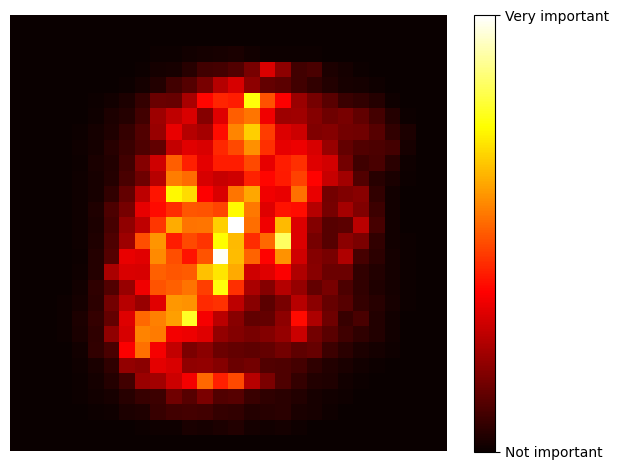

In [29]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")
    
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 定义和训练随机森林模型: 
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()

### 7.5 提升方法
- 提升法(boosting，最初被称为假设提升)是指可以将几个弱学习器结合成一个强学习器的任意集成方法。
- 大多数提升法的总体思路是循环训练预测器，每一次都对其前序做出一些改正。
- 可用的提升法有很多，但目前最流行的方法是AdaBoost(Adaptive Boosting的简称, 即自适应增强)和梯度提升(Gradient Boosting)。
- 自适应增强(AdaBoost): 新预测器对其前序进行纠正的方法之一就是<font color="red">更多地关注前序欠拟合的训练实例，从而使新的预测器不断地越来越专注于难缠的问题</font>，这就是AdaBoost使用的技术。**加权误差率**是根据当前弱分类器对整个训练集上的表现计算的。
- 梯度提升(Gradient Boosting): 与AdaBoost一样，梯度提升也是逐步在集成中添加预测器，每一个都对其前序做出改正。不同之处在于，它不是像AdaBoost那样在每个迭代中调整实例权重，而是<font color="red">让新的预测器针对前一个预测器的残差进行拟合</font>。
- 在梯度提升回归树(Gradient Boosted Regression Trees, GBRT)中，树的数量太少会导致欠拟合，树的数量过多会导致过拟合。要找到树的最佳数量，可以使用提前停止法。

### 7.6 堆叠法
- 堆叠法(stacking)： 底部的三个预测器分别预测了不同的值(3.1、2.7和2.9)，然后最终的预测器(称为混合器或元学习器)将这些预测作为输入，进行最终预测(3.0)。

## 第8章 降维
- 本章将探讨维度的诅咒，简要介绍高维空间中发生的事情。然后，我们将介绍两种主要的数据降维方法(投影和流形学习)，并学习现在最流行的三种数据降维技术：PCA、Kernal PCA以及LLE。

### 8.1 维度的诅咒
- 高维数据集有很大可能是非常稀疏的：大多数训练实例可能彼此之间相距很远。当然，这也意味着新的实例很可能远离任何一个训练实例，导致跟低维度相比，预测更加不可靠，因为它们基于更大的推测。简而言之，<font color="red">训练集的维度越高，过拟合的风险就越大。</font>

### 8.2 降维的主要方法
- **投影(Projection)**: 在大多数实际问题中，训练实例并不是均匀地分布在所有维度上。许多特征几乎是恒定不变的，而其他特征则是高度相关的。结果，所有训练实例都位于(或接近于)高维空间的低维子空间内。
- **流形学习(Manifold Learning)**：许多降维算法通过对训练实例所在的流形进行建模来工作。这称为流形学习。它依赖于流形假设(也称为流形假说)，该假设认为大多数现实世界的高维数据集都接近于低维流形。通常这是根据经验观察到的这种假设。

### 8.3 主成分分析(PCA)
- 主成分分析(PCA)是迄今为止最流行的降维算法。首先，它识别最靠近数据的超平面，然后将数据投影到其上，如图8-2所示。
- **保留差异性**: 选择保留最大差异性的轴丢失的信息更少。比较原始数据集与其轴上的投影之间的均方距离，使这个均方距离最小的轴是最合理的选择。
- **主要成分**：主成分分析可以在训练集中识别出哪条轴对差异性的贡献度最高。奇异值分解(SVD)可以将训练集矩阵$X$分解为三个矩阵$UΣV^T$的矩阵乘法，其中$V$包含定义所有主要成分的单位向量。
- **向下投影到d维度**: 一旦确定了所有主要成分，你就可以将数据集投影到前d个主要成分定义的超平面上，从而将数据集的维度降低到d维。选择这个超平面可确保投影将保留尽可能多的差异性。
- **使用Scikit-Learn**: `from sklearn.decomposition import PCA `
- **可解释方差比**: 可以通过`explained_variance_ratio_`变量来获得。
- **选择正确的维度**: 与其任意选择要减小到的维度，不如选择相加足够大的方差部分(例如95%)的维度。
- **PCA压缩**: 降维后，训练集占用的空间要少得多。例如，将PCA应用于MNIST数据集，同时保留其95%的方差。你会发现每个实例将具有150多个特征，而不是原始的784个特征。因此，尽管保留了大多数方差，但数据集现在不到其原始大小的20%！此外，通过应用PCA投影的逆变换`inverse_transform()`，还可以将缩减后的数据集解压缩回784维。
- **随机PCA**: 可以快速找到前d个主成分的近似值。当d远远小于n时，它比完全的SVD快得多。
- **增量PCA**: 可以使你把训练集划分为多个小批量，并一次将一个小批量送入IPCA算法。这对于大型训练集和在线(即在新实例到来时动态运行)应用PCA很有用。

### 8.4 内核PCA
- **内核PCA**: 通常擅长在投影后保留实例的聚类，有时甚至可以展开位于扭曲流形附近的数据集。`from sklearn.decomposition import KernelPCA`
- 由于kPCA是一种无监督学习算法，因此没有明显的性能指标可以帮助你选择最好的内核和超参数值。也就是说，降维通常是有监督学习任务(例如分类)的准备步骤，因此你可以使用网格搜索来选择在该任务上能获得最佳性能的内核和超参数。
- 另一种完全无监督的方法是选择产生最低重构误差的内核和超参数。

### 8.5 局部线性嵌入(LLE)
- 局部线性嵌入(LLE)是另一种强大的非线性降维(NLDR)技术[1]。它是一种流形学习技术，不像以前的算法那样依赖于投影。
- 简而言之，LLE的工作原理是首先测量每个训练实例如何与其最近的邻居(c.n.)线性相关，然后寻找可以最好地保留这些局部关系的训练集的低维表示形式(稍后会详细介绍)。这种方法特别适合于展开扭曲的流形，尤其是在没有太多噪声的情况下。

Saving figure swiss_roll_plot


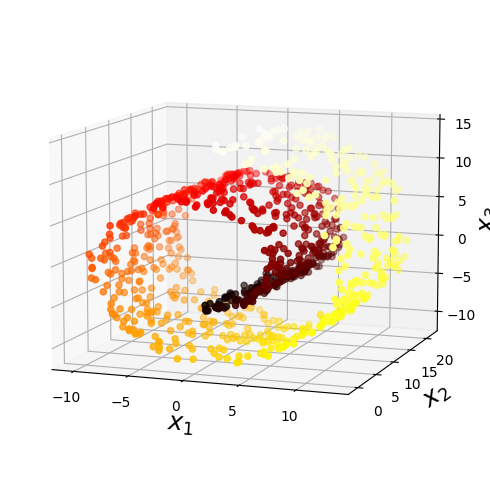

In [31]:
# 获取瑞士卷的数据集
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# 绘制可视化图形
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("swiss_roll_plot")
plt.show()

Saving figure lle_unrolling_plot


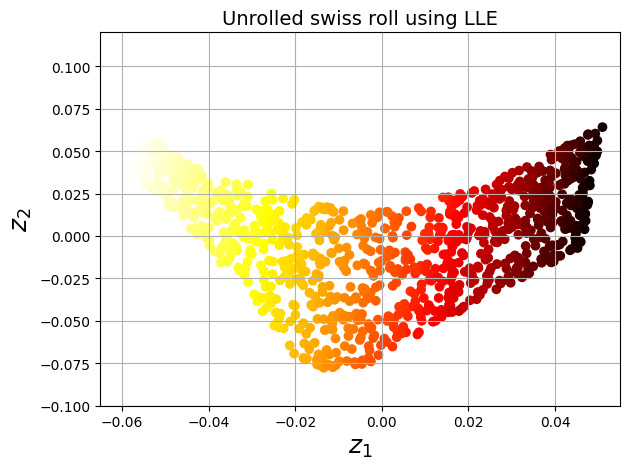

In [32]:
# 使用局部线性嵌入(LLE)进行数据可视化。
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

### 8.6 其他降维技术
- 随机投影(Random Projections): 使用随机线性投影将数据投影到较低维度的空间。
- 多维缩放(Multidimensional Scaling, MDS): 当尝试保留实例之间的距离时降低维度。
- Isomap: 通过将每个实例与其最近的邻居连接来创建一个图，然后在尝试保留实例之间的测地距离的同时降低维度。
- t分布随机近邻嵌入(t-SNE): 降低了维度，同时使相似实例保持接近，异类实例分开。
- 线性判别分析(LDA): LDA是一种分类算法，但是在训练过程中，它会学习各类之间最有判别力的轴，然后可以使用这些轴来定义要在其上投影数据的超平面。

## 第9章 无监督学习技术
计算机科学家Yann LeCun曾有句著名的话：**“如果智能是蛋糕，无监督学习将是蛋糕本体，有监督学习是蛋糕上的糖霜，强化学习是蛋糕上的樱桃。”**换句话说，无监督学习具有巨大的潜力，我们才刚刚开始研究。

在第8章中，我们研究了最常见的无监督学习任务：降维。在本章中，我们将研究其他一些无监督的学习任务和算法：
- 聚类： 目标是将相似的实例分组到集群中。聚类是很好的工具，用于数据分析、客户细分、推荐系统、搜索引擎、图像分割、半监督学习、降维等。
- 异常检测：目的是学习“正常”数据看起来是什么样的，然后将其用于检测异常情况，例如生产线上的缺陷产品或时间序列中的新趋势。
- 密度估算：这是估计生成数据集的随机过程的概率密度函数（probability density function, PDF）的任务，密度估算通常用于异常检测：位于非常低密度区域的实例很可能是异常。它对于数据分析和可视化也很有用。

准备好蛋糕了吗？我们将从使用K-Means和DBSCAN进行聚类开始，然后讨论高斯混合模型，并了解如何将它们用于密度估计、聚类和异常检测。

### 9.1 K-Means聚类
- 聚类算法的应用包括: 客户细分、数据分析、降维技术、异常检测、半监督学习、搜索引擎、分割图像。
- K-Means算法是一种简单的算法，能够非常快速、高效地对此类数据集进行聚类，通常只需几次迭代即可。
- **中心点初始化方法**: (1) 人为指定中心点；（2）使用不同的随机初始化多次运行算法，并保留最优解(通过**模型惯性**度量，即每个实例与其最接近的中心点之间的均方距离)。
- **K-Means++**: K-Means++引入了一种更智能的初始化步骤，该步骤倾向于选择彼此相距较远的中心点，这一改进使得K-Means算法收敛到次优解的可能性很小。他们表明，更智能的初始化步骤所需的额外计算量是值得的，因为它可以大大减少寻找最优解所需运行算法的次数。
- **加速的K-Means和小批量K-Means**: 
    - 加速的K-Means: 该改进后的算法通过避免许多不必要的距离计算，大大加快了算法的速度。Elkan通过利用三角不等式并通过跟踪实例和中心点之间的上下限距离来实现这一目的。
    - 小批量K-Means: 在每次迭代中使用小批量K-Means稍微移动中心点，而不是在每次迭代中使用完整的数据集。这将算法的速度提高了3到4倍，并且可以对不容纳内存的大数据集进行聚类。`from sklearn.cluster import MiniBatchKMeans`    
- **寻找最佳聚类数**: (1) 惯性(随着k的增加，惯性会不断降低)。（2）轮廓系数(当进行适当的聚类时，轮廓系数最大)。
- **K-Means的局限性**: (1) 必须多次运行该算法才能避免次优解; (2) 需要指定集群数; (3) 当集群具有不同的大小、不同的密度或非球形时，K-Means的表现也不佳。

### 9.2 聚类的应用
- 使用聚类进行图像分割: 如果像素具有相似的颜色，我们将简单地将它们分配给同一分割。
- 使用聚类进行预处理: 聚类是一种有效的降维方法，特别是作为有监督学习算法之前的预处理步骤。
- 使用聚类进行半监督学习: 聚类的另一个应用是在半监督学习中，我们有很多未标记的实例，而很少带标签的实例。

In [34]:
# 使用聚类算法进行图像分割
import os
import urllib

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7cdbf81a5630>)

In [35]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [37]:
from sklearn.cluster import KMeans
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Saving figure image_segmentation_diagram


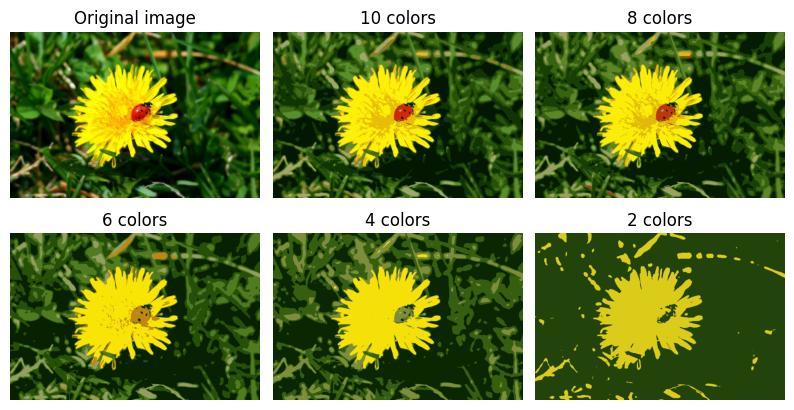

In [40]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

当你使用少于8个集群时，请注意，瓢虫的闪亮红色不能聚成单独的一类，它将与环境中的颜色合并。这是因为<font color="red">K-Means更喜欢相似大小的集群。</font>瓢虫很小，比图像的其余部分要小得多，所以即使它的颜色是鲜明的，K-Means也不能为它指定一个集群。

### 9.3 基于密度的抗噪聚类方法DBSCAN
-  基于密度的抗噪聚类方法(Density-Based Spatial Clustering of Applications with Noise, DBSCAN)是一种非常简单但功能强大的算法，能够识别任何数量的任何形状的集群。它对异常值具有鲁棒性，并且只有两个超参数（`eps`和`min_samples`）。

**其他聚类算法:**
- 聚集聚类(Agglomerative clustering)
- BIRCH(Balanced Iterative Reducing and Clustering using Hierarchies)
- 均值漂移(Mean-Shift)
- 相似性传播(Affinity propagation)
- 谱聚类(Spectral clustering)

## 9.4 高斯混合模型
- 高斯混合模型（GMM）是一种概率模型，它假定实例是由多个参数未知的高斯分布的混合生成的。
- <font color="red">如何理解高斯混合模型</font>: **核心思想是，假设数据是由多个不同的高斯分布混合生成的。**这些高斯分布的参数（如均值和方差）以及它们的权重（每个分布的贡献程度）是需要估计的。 https://mp.weixin.qq.com/s?__biz=MjM5NzEyMzg4MA==&mid=2649505493&idx=6&sn=7064baecee587ccc9d1a23d18eb8526e
- Scikit-Learn中的GaussianMixture类赖于期望最大化（Expectation-Maximization，EM）算法，该算法与K-Means算法有很多相似之处：它随机初始化集群参数，然后重复两个步骤直到收敛，首先将实例分配给集群（这称为期望步骤），然后更新集群（这称为最大化步骤）。
- 对于每个实例，在**期望(expectation)**步骤中，该算法（基于当前的集群参数）估计它属于每个集群的概率。然后，在**最大化(maximization)**步骤中，使用数据集中的所有实例来更新每个聚类，并通过每个实例属于该集群的估计概率对其进行加权。

- **使用高斯混合进行异常检测**: 位于低密度区域的任何实例都可以被视为异常。
- **选择聚类数**: 贝叶斯信息准则（Bayesian information criterion, BIC）和赤池信息准则（AIC, Akaike information criterion）。
    - 赤池信息量准则（Akaike information criterion，AIC）是评估统计模型的复杂度和衡量统计模型“拟合”资料之优良性(Goodness of fit)的一种标准，是由日本统计学家赤池弘次创立和发展的。赤池信息量准则建立在信息熵的概念基础上。$AIC=2p-2log(\hat L)$
    - 贝叶斯信息准则，（Bayesian Information Criterion，BIC）。贝叶斯决策理论是主观贝叶斯派归纳理论的重要组成部分。是在不完全情报下，对部分未知的状态用主观概率估计，然后用贝叶斯公式对发生概率进行修正，最后再利用期望值和修正概率做出最优决策。$AIC=log(m)p - 2log(\hat L)$
    - $m$是样本数量，$p$是模型学习的参数量，$\hat L$是模型的似然函数的最大值。
    
- **贝叶斯高斯混合模型**：你可以使用BayesianGaussianMixture类，而不是手动搜索集群的最佳数目，该类能够为不必要的集群赋予等于（或接近于）零的权重。将集群数目n_components设置为一个你有充分理由相信的值，该值大于最佳集群的数量，算法会自动消除不必要的集群。

其他用于异常检测和新颖性检测的算法:
- PCA（以及其他拥有`inverse_transform()`方法的降维技术）
- Fast-MCD（minimum covariance determinant）
- 孤立森林(Isolation Forest)
- 局部离群因子(Local Outlier Factor)
- 单类SVM(One-class SVM)